# 2.5 - Kepler

https://kepler.gl/

https://eng.uber.com/keplergl/

In [2]:
%pip install keplergl

In [3]:
import geopandas as gpd

from keplergl import KeplerGl

import numpy as np

In [4]:
mex=gpd.read_file('../data/mexico.geojson')   # cargar datos geoespaciales (multipolygon)

mex.head()

name                created_at                updated_at  \
0      Baja California 2013-12-01 18:59:38+01:00 2013-12-01 18:59:38+01:00   
1               Sonora 2013-12-01 18:59:38+01:00 2013-12-01 18:59:38+01:00   
2  Baja California Sur 2013-12-01 18:59:38+01:00 2013-12-01 18:59:38+01:00   
3            Zacatecas 2013-12-01 18:59:38+01:00 2013-12-01 18:59:38+01:00   
4              Durango 2013-12-01 18:59:38+01:00 2013-12-01 18:59:38+01:00   

   cartodb_id                                           geometry  
0           6  MULTIPOLYGON (((-112.66384 28.41883, -112.6654...  
1           7  MULTIPOLYGON (((-114.88259 32.49215, -114.8809...  
2           8  MULTIPOLYGON (((-112.75825 27.97538, -112.7574...  
3           9  MULTIPOLYGON (((-101.84881 25.01762, -101.8319...  
4          10  MULTIPOLYGON (((-105.96732 26.78554, -105.9391...

In [5]:
mex.info(memory_usage='deep')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype                               
---  ------      --------------  -----                               
 0   name        32 non-null     object                              
 1   created_at  32 non-null     datetime64[ns, pytz.FixedOffset(60)]
 2   updated_at  32 non-null     datetime64[ns, pytz.FixedOffset(60)]
 3   cartodb_id  32 non-null     int64                               
 4   geometry    32 non-null     geometry                            
dtypes: datetime64[ns, pytz.FixedOffset(60)](2), geometry(1), int64(1), object(1)
memory usage: 3.4 KB


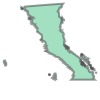

In [10]:
mex.geometry[0]

In [11]:
mex=mex.sort_values(by='name').reset_index()[['name', 'geometry']]  # ordenado por estado
mex.head()

name                                           geometry
0       Aguascalientes  MULTIPOLYGON (((-102.28786 22.41649, -102.2875...
1      Baja California  MULTIPOLYGON (((-112.66384 28.41883, -112.6654...
2  Baja California Sur  MULTIPOLYGON (((-112.75825 27.97538, -112.7574...
3             Campeche  MULTIPOLYGON (((-90.57152 19.82716, -90.57175 ...
4              Chiapas  MULTIPOLYGON (((-91.97364 17.91143, -91.96993 ...

In [12]:
mex['data']=[i**3+30-i**2 for i in range(len(mex))]  # datos inventados

mex.head()

name                                           geometry  \
0       Aguascalientes  MULTIPOLYGON (((-102.28786 22.41649, -102.2875...   
1      Baja California  MULTIPOLYGON (((-112.66384 28.41883, -112.6654...   
2  Baja California Sur  MULTIPOLYGON (((-112.75825 27.97538, -112.7574...   
3             Campeche  MULTIPOLYGON (((-90.57152 19.82716, -90.57175 ...   
4              Chiapas  MULTIPOLYGON (((-91.97364 17.91143, -91.96993 ...   

   data  
0    30  
1    30  
2    34  
3    48  
4    78

In [13]:
mex=mex.rename(columns={'name':'estado'})

In [18]:
mapa_k=KeplerGl(height=600, width=800)  # inicializas el mapa

mapa_k.add_data(mex.copy(), 'Mexico')  # se añaden datos con un nombre

mapa_k.save_to_html(file_name='mapa_kepler.html')  # se guarda

mapa_k # se representa

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to mapa_kepler.html!


KeplerGl(data={'Mexico': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, …

In [16]:
config=mapa_k.config

In [19]:
mapa_k=KeplerGl(height=600, width=800, config=config)  # inicializas el mapa

mapa_k.add_data(mex.copy(), 'Mexico')  # se añaden datos con un nombre

mapa_k.save_to_html(file_name='mapa_kepler.html')  # se guarda

mapa_k # se representa

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to mapa_kepler.html!


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'sf6to1d', 'type': …